### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

### Reading Dataset

In [2]:
house = pd.read_csv('shack_lab_housing_data.csv')
house

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


## Pre-Processing

In [3]:
# Checking Basic Info

house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [4]:
house.shape

(414, 9)

In [5]:
house['House Age'].value_counts()

0.0     17
13.6     7
13.3     6
16.2     6
16.4     6
        ..
30.2     1
4.3      1
24.0     1
8.4      1
18.8     1
Name: House Age, Length: 236, dtype: int64

In [6]:
house['Number of bedrooms'].value_counts()

1    141
2    137
3    136
Name: Number of bedrooms, dtype: int64

In [7]:
# Rename Columns

house.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

In [8]:
house.rename(columns = {'Transaction date' : 'Transaction_Date', 'House Age' : 'House_Age',
       'Distance from nearest Metro station (km)' : 'Distance(km)_From_Nearest_Metro_Station',
       'Number of convenience stores' : 'Number_Of_Convenience_Stores', 'latitude' : 'Latitude', 'longitude' : 'Longitude',
       'Number of bedrooms' : 'Number_Of_Bedrooms', 'House size (sqft)' : 'House_Size(sqft)', 'House price of unit area' : 'House_Price_Of_Unit_Area'}, inplace = True)

In [9]:
house.head()

,Transaction_Date,House_Age,Distance(km)_From_Nearest_Metro_Station,Number_Of_Convenience_Stores,Latitude,Longitude,Number_Of_Bedrooms,House_Size(sqft),House_Price_Of_Unit_Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


<AxesSubplot:>

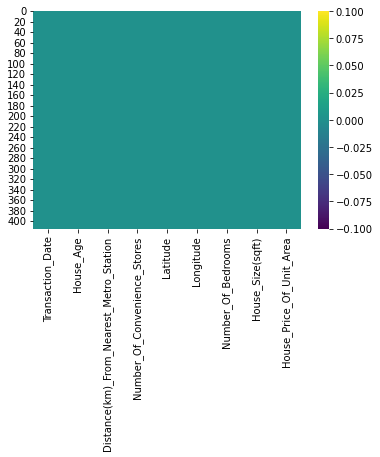

In [10]:
# Working With Missing Values

sns.heatmap(house.isnull(), cbar = "True", cmap = 'viridis')

In [11]:
house.isnull().sum()

Transaction_Date                           0
House_Age                                  0
Distance(km)_From_Nearest_Metro_Station    0
Number_Of_Convenience_Stores               0
Latitude                                   0
Longitude                                  0
Number_Of_Bedrooms                         0
House_Size(sqft)                           0
House_Price_Of_Unit_Area                   0
dtype: int64

In [12]:
# Checking Duplicate Values

house.duplicated().sum()

0

In [13]:
# Working With Outliers

cols = house.select_dtypes(exclude='object').columns.tolist()

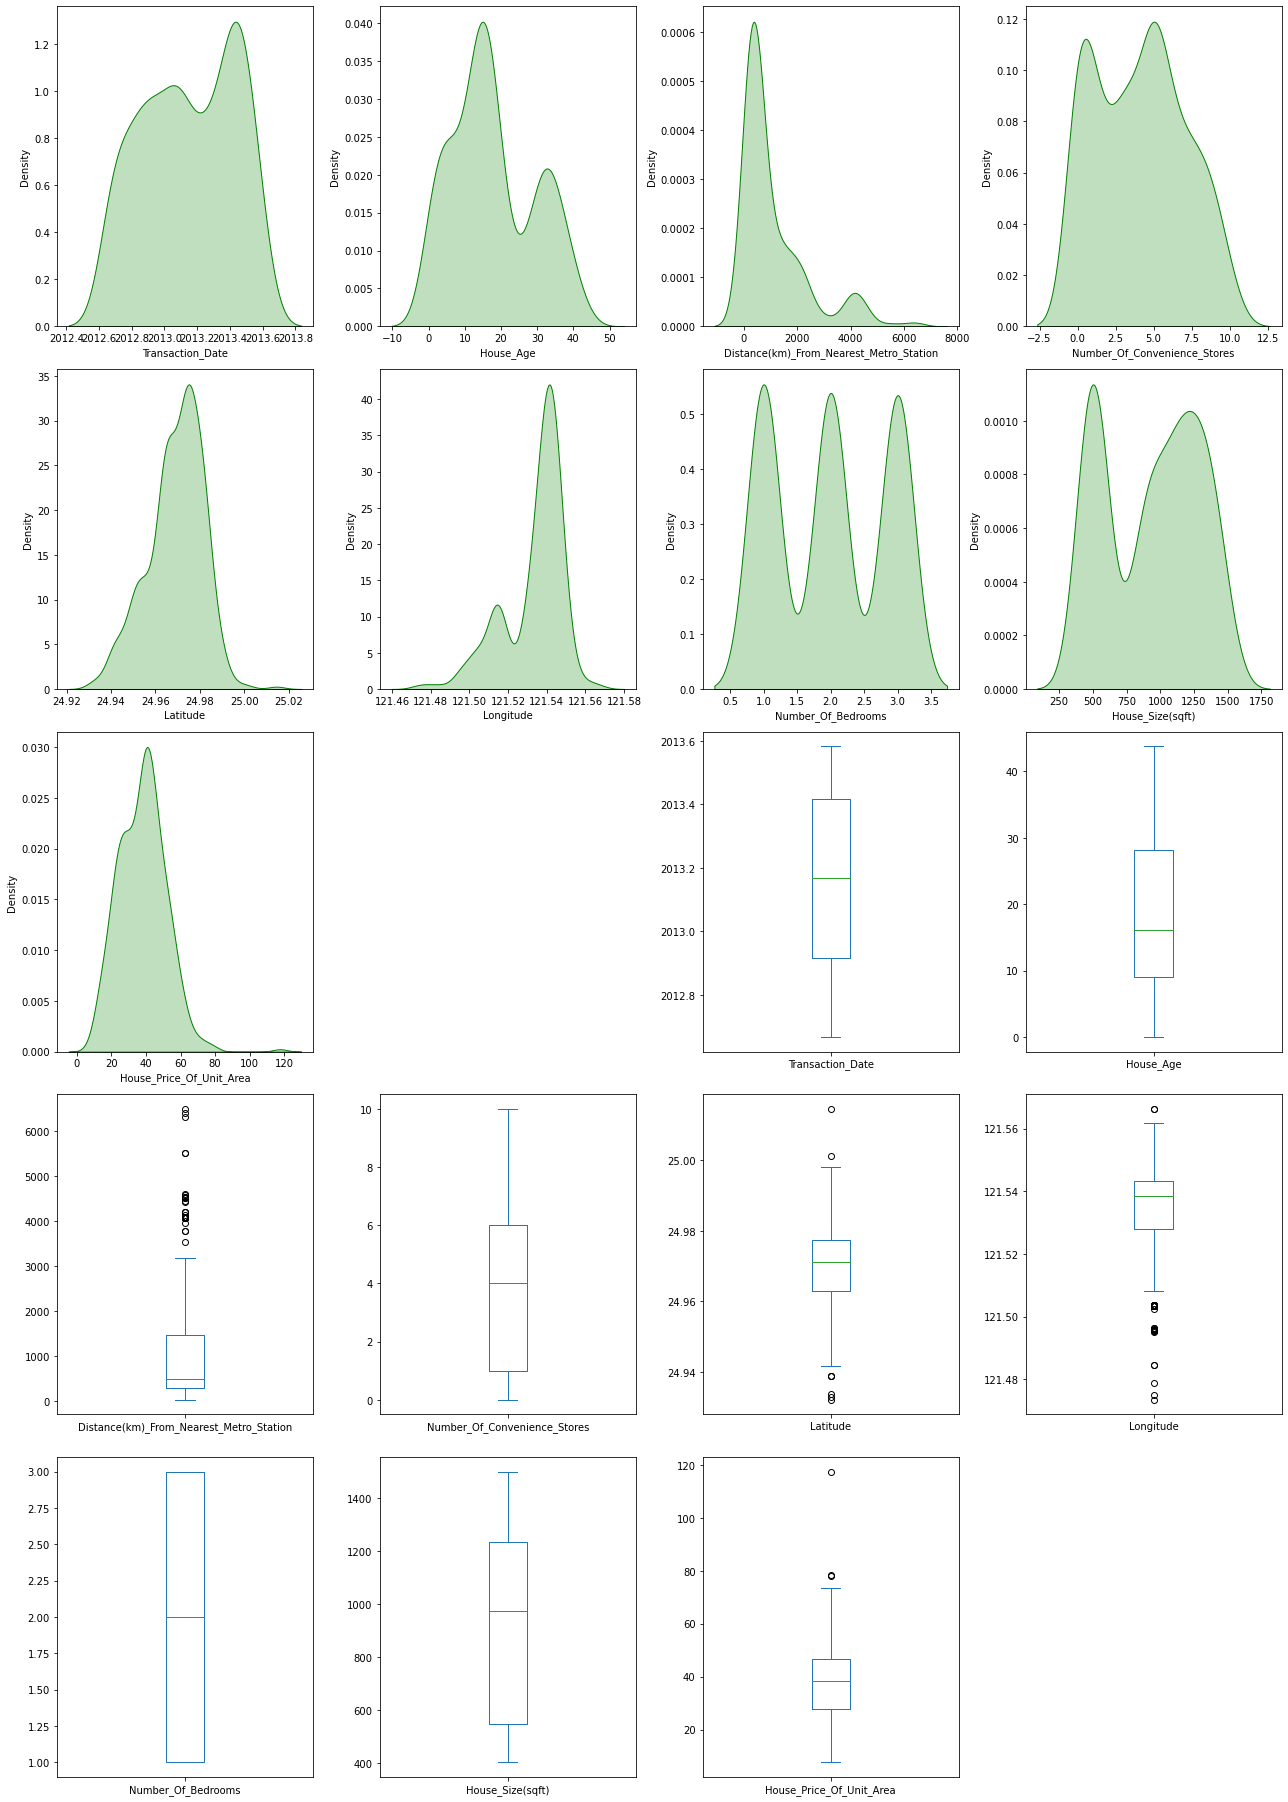

In [14]:
plt.figure(figsize=(18,40))
for i,col in enumerate(cols,1):
    plt.subplot(8,4,i)
    sns.kdeplot(house[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    house[col].plot.box()
plt.tight_layout() 
plt.show()

In [15]:
# Removing outlier values 

house.drop(house[(house['House_Price_Of_Unit_Area'] > 100)].index, inplace=True)
house.drop(house[(house['Distance(km)_From_Nearest_Metro_Station'] > 5000)].index, inplace=True)
house.drop(house[(house['Latitude'] > 25.00)].index, inplace=True)

In [16]:
house

,Transaction_Date,House_Age,Distance(km)_From_Nearest_Metro_Station,Number_Of_Convenience_Stores,Latitude,Longitude,Number_Of_Bedrooms,House_Size(sqft),House_Price_Of_Unit_Area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,1,503,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,1,597,52.5


### Some Basic Visualizations

<AxesSubplot:xlabel='House_Age', ylabel='House_Price_Of_Unit_Area'>

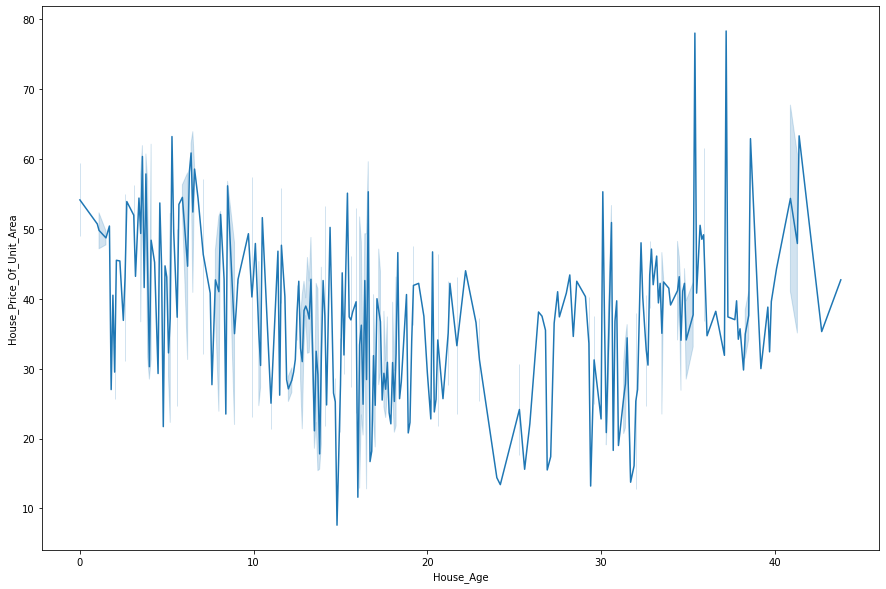

In [17]:
fig, ax = plt.subplots(figsize = (15,10))
sns.lineplot(x = "House_Age", y = "House_Price_Of_Unit_Area", data = house, ax=ax )

## Model Building

In [18]:
house.columns

Index(['Transaction_Date', 'House_Age',
       'Distance(km)_From_Nearest_Metro_Station',
       'Number_Of_Convenience_Stores', 'Latitude', 'Longitude',
       'Number_Of_Bedrooms', 'House_Size(sqft)', 'House_Price_Of_Unit_Area'],
      dtype='object')

In [19]:
X = house[['Transaction_Date', 'House_Age',
       'Distance(km)_From_Nearest_Metro_Station',
       'Number_Of_Convenience_Stores', 'Latitude', 'Longitude',
       'Number_Of_Bedrooms', 'House_Size(sqft)']]
y = house['House_Price_Of_Unit_Area']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

0.6142369074293226

In [22]:
predictions = lr.predict(X_test)
predictions

array([43.15931729, 46.99912833, 29.58021434, 44.32432751, 45.3575855 ,
       39.34089826, 37.13497636, 33.34587049, 37.92780089, 37.6599389 ,
       47.21263663, 36.09736986, 43.73968392, 40.7203346 , 28.05716339,
       35.76836394, 44.94326138, 32.28559671, 48.38192845, 28.12485881,
       36.88560276, 39.32404762, 46.76003129, 29.91562669, 14.19384522,
       32.21639068, 44.18307125, 30.26064413, 49.25536684, 49.55476307,
       42.14619966, 29.54126174, 13.9294014 , 36.09780181, 44.95877516,
       33.24545575, 36.95326996, 44.00299041, 38.17072961, 43.86085851,
       52.38154094, 34.96458075, 47.13147518, 39.43183865, 39.93767097,
       48.21341581, 24.88599175, 45.06462791, 49.12408112, 40.32451875,
       48.64139116, 44.47445591, 44.39932398, 47.61027678, 41.25615234,
       47.11719258, 43.97839699, 40.63647942, 47.32523229, 44.6336423 ,
       52.25034332, 41.79727261, 36.48060323, 44.12628726, 22.91324489,
       46.5999179 , 42.0631901 , 27.47696215, 48.49175161, 43.38

In [23]:
from sklearn.metrics import r2_score
score0 = r2_score(y_test, predictions)
score0

0.6142369074293226

Text(0, 0.5, 'Predictions')

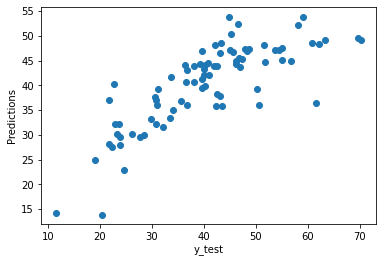

In [24]:
plt.scatter(y_test, predictions)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [25]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.804087604712589
MSE: 58.333775323866654
RMSE: 7.637655093277429


### Ridge Regression

In [26]:
from sklearn.linear_model import Ridge 
ridgeR = Ridge(alpha = 2) 
ridgeR.fit(X_train, y_train) 
#y_pred = ridgeR.predict(X_test) 

Ridge(alpha=2)

In [27]:
ridgeR.score(X_train, y_train)
ridgeR.score(X_test, y_test)

0.5882846155500194

In [28]:
predictions1 = ridgeR.predict(X_test)
predictions1

array([38.27785879, 45.97609176, 29.33744745, 45.89352878, 47.08906489,
       39.35339131, 35.69396184, 32.85289927, 37.36151524, 39.69456003,
       48.74309159, 36.67655858, 45.17950812, 42.78220589, 27.94358635,
       33.63288602, 46.44040913, 32.07325938, 52.02636386, 28.01243795,
       32.52376273, 38.27698455, 45.74548326, 32.06989396, 15.0921419 ,
       32.89189579, 45.73106008, 30.7288627 , 48.2194505 , 48.53142515,
       43.56923492, 30.13728269, 14.83694293, 35.1251205 , 43.22042341,
       32.59696997, 36.1999299 , 43.83933936, 37.54529743, 44.56218932,
       51.29969017, 34.83252449, 46.49577042, 38.15300911, 38.82162866,
       47.21395163, 28.42853582, 43.31492355, 48.58857412, 36.32136933,
       48.95312729, 43.88365995, 42.59238447, 45.74886208, 41.86713782,
       48.6649451 , 42.9866586 , 41.51732785, 48.86142373, 42.85909787,
       52.53475778, 45.29985611, 35.86255373, 43.35039332, 21.60490869,
       45.04722204, 42.73010443, 27.10087227, 46.65579306, 39.47

In [29]:
from sklearn.metrics import r2_score
score1 = r2_score(y_test, predictions1)
score1

0.5882846155500194

Text(0, 0.5, 'Predictions')

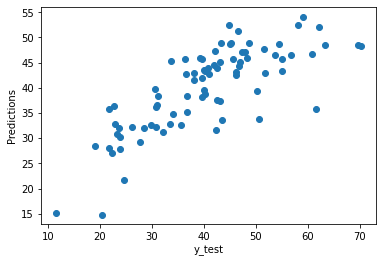

In [30]:
plt.scatter(y_test, predictions1)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [31]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions1))
print('MSE:', metrics.mean_squared_error(y_test, predictions1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions1)))

MAE: 6.073473992883005
MSE: 62.258192129886815
RMSE: 7.89038605708788


### Lasso Regression

In [32]:
from sklearn.linear_model import Lasso 
lasso = Lasso(alpha = 0.1) 
lasso.fit(X_train, y_train) 

Lasso(alpha=0.1)

In [33]:
lasso.score(X_train, y_train)
lasso.score(X_test, y_test)


0.5764971159900509

In [34]:
predictions2 = lasso.predict(X_test)
predictions2

array([38.03669754, 45.71814219, 29.42765661, 46.32023466, 46.7260069 ,
       38.92150662, 35.62794483, 33.02688834, 36.99864456, 40.26252975,
       48.70627869, 37.18122888, 45.54574061, 42.51295043, 28.24503043,
       33.52800615, 46.23358816, 31.72260646, 51.6669881 , 28.19964088,
       32.52299092, 37.95544212, 45.92182871, 32.12164131, 15.56957451,
       33.12444759, 46.03866967, 30.22026816, 48.02108225, 48.23624269,
       43.2958842 , 30.00510279, 15.14111771, 34.83020213, 43.07220239,
       32.90299338, 36.11442832, 43.63772266, 37.66074456, 44.08860257,
       51.15958146, 34.59547959, 46.65003025, 38.03038566, 39.19152403,
       47.51543195, 28.47770191, 43.3306987 , 48.0216476 , 36.55753286,
       49.33997486, 43.66487079, 43.09447865, 45.64010323, 42.55847518,
       48.52137464, 42.56141362, 41.70215814, 48.79927147, 42.97703729,
       52.25896689, 45.00936296, 35.23073525, 42.98662183, 21.89869034,
       45.33374651, 43.03186165, 27.32431173, 46.50668815, 39.19

In [35]:
from sklearn.metrics import r2_score
score2 = r2_score(y_test, predictions2)
score2

0.5764971159900509

Text(0, 0.5, 'Predictions')

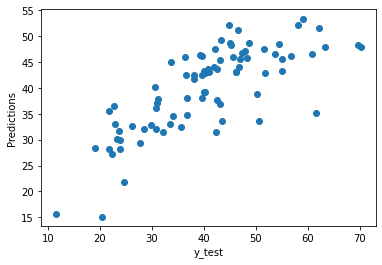

In [36]:
plt.scatter(y_test, predictions2)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [37]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions2))
print('MSE:', metrics.mean_squared_error(y_test, predictions2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions2)))

MAE: 6.144728703257937
MSE: 64.04065749322481
RMSE: 8.002540689882483


### Random Forest Regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
random_reg = RandomForestRegressor()
random_reg.fit(X_train, y_train)

RandomForestRegressor()

In [39]:
random_reg.score(X_train, y_train)
random_reg.score(X_test, y_test)

0.7762460290240878

In [40]:
predictions3 = random_reg.predict(X_test)
predictions3

array([33.679, 42.818, 24.433, 42.941, 51.781, 33.439, 28.041, 27.92 ,
       37.179, 36.952, 47.659, 33.768, 47.972, 42.875, 24.91 , 37.49 ,
       49.186, 27.215, 51.002, 24.893, 30.857, 28.229, 55.71 , 27.009,
       14.423, 29.413, 47.889, 25.47 , 67.254, 67.444, 44.295, 24.278,
       14.49 , 39.522, 48.986, 37.613, 25.195, 48.565, 39.084, 40.805,
       45.612, 38.847, 57.781, 40.213, 38.529, 44.845, 17.1  , 47.785,
       59.102, 32.999, 49.302, 46.103, 49.921, 54.686, 44.227, 48.141,
       42.153, 37.014, 47.496, 48.527, 58.468, 43.42 , 39.725, 46.98 ,
       23.221, 50.55 , 44.66 , 26.056, 55.199, 38.804, 26.534, 28.591,
       49.729, 44.597, 47.125, 54.863, 58.837, 56.095, 41.548, 39.106,
       47.915, 26.214])

In [41]:
from sklearn.metrics import r2_score
score3 = r2_score(y_test, predictions3)
score3

0.7762460290240878

Text(0, 0.5, 'Predictions')

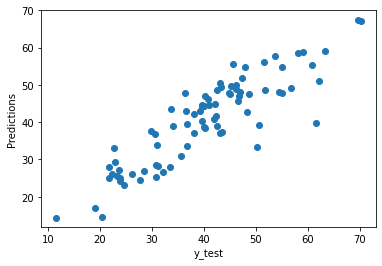

In [42]:
plt.scatter(y_test, predictions3)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [43]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions3))
print('MSE:', metrics.mean_squared_error(y_test, predictions3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions3)))

MAE: 4.560536585365853
MSE: 33.8353101219512
RMSE: 5.816812711610303


### XGB Regressor

In [44]:
import xgboost as xgb
from sklearn.metrics import explained_variance_score

In [45]:
xgb_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg.fit(X_train, y_train)

[23:23:35] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=75, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [46]:
xgb_reg.score(X_train, y_train)
xgb_reg.score(X_test, y_test)

0.7985673502943009

In [47]:
predictions4 = xgb_reg.predict(X_test)
predictions4

array([30.23525 , 43.35445 , 25.492702, 38.66177 , 48.329292, 30.459316,
       29.21309 , 25.647741, 37.754604, 39.051178, 46.827953, 33.04422 ,
       49.212788, 38.425056, 27.634945, 41.711605, 53.290638, 31.596132,
       54.59057 , 25.977997, 32.46739 , 26.899649, 53.285007, 28.046885,
       16.438663, 27.39713 , 46.82959 , 31.51803 , 68.72347 , 67.04794 ,
       42.3404  , 21.721155, 18.41118 , 44.078934, 46.83959 , 38.211304,
       27.38146 , 47.470802, 41.31635 , 37.4807  , 42.23268 , 37.69247 ,
       59.54442 , 43.10276 , 39.691605, 42.869568, 19.69417 , 51.69804 ,
       60.927387, 26.130276, 48.45653 , 42.55001 , 47.385506, 53.17067 ,
       45.93512 , 46.722527, 43.333176, 36.907555, 45.77447 , 51.03031 ,
       54.81028 , 41.359364, 42.911304, 49.527905, 22.125757, 47.48818 ,
       47.13691 , 21.499783, 53.74449 , 42.310642, 25.599531, 25.609455,
       45.23076 , 43.573765, 47.548176, 52.731697, 55.048958, 47.66996 ,
       40.954098, 41.88141 , 47.161957, 26.593794],

In [48]:
from sklearn.metrics import r2_score
score4 = r2_score(y_test, predictions4)
score4

0.7985673502943009

Text(0, 0.5, 'Predictions')

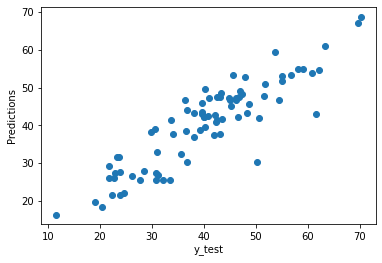

In [49]:
plt.scatter(y_test, predictions4)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions4))
print('MSE:', metrics.mean_squared_error(y_test, predictions4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions4)))

MAE: 4.282611577103777
MSE: 30.459956271401335
RMSE: 5.5190539290173035


### Decision Tree Regression

In [51]:
from sklearn.tree import DecisionTreeRegressor
decision_reg = DecisionTreeRegressor()
decision_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [52]:
decision_reg.score(X_train, y_train)
decision_reg.score(X_test, y_test)

0.6214612069384351

In [53]:
predictions5 = decision_reg.predict(X_test)
predictions5

array([32.2, 29.3, 21.8, 42. , 41.4, 29.3, 28.9, 29.3, 44.2, 34.1, 49. ,
       28.5, 51.6, 47. , 22.8, 28.8, 55.5, 21.8, 51.7, 27.7, 31.3, 31.7,
       57.1, 28.9, 12.9, 31.9, 42. , 25.6, 73.6, 73.6, 48.5, 23.1, 14.7,
       38.4, 51. , 34.2, 23.6, 41.4, 40.1, 32.5, 37.9, 39.6, 52.7, 44.2,
       40.5, 43.4, 16.7, 53. , 59.5, 40.3, 58.8, 56.2, 53.3, 56.2, 39.1,
       51.6, 47. , 37.4, 49. , 53. , 59.5, 45.4, 38.4, 57.1, 21.8, 52.5,
       39.1, 27. , 58.8, 40.3, 28.6, 30.1, 52.2, 47.1, 51. , 57.4, 58.1,
       58.1, 43.2, 42.3, 54.4, 29.5])

In [54]:
from sklearn.metrics import r2_score
score5 = r2_score(y_test, predictions5)
score5

0.6214612069384351

Text(0, 0.5, 'Predictions')

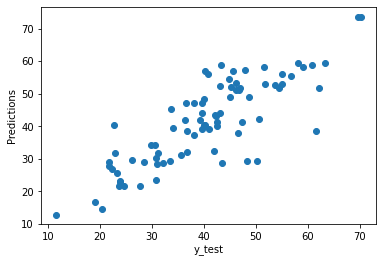

In [55]:
plt.scatter(y_test, predictions5)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [56]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions5))
print('MSE:', metrics.mean_squared_error(y_test, predictions5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions5)))

MAE: 5.569512195121952
MSE: 57.24134146341464
RMSE: 7.565800781372362


### KNN Regression

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5) 
knn_reg.fit(X_train, y_train)

KNeighborsRegressor()

In [58]:
knn_reg.score(X_train, y_train)
knn_reg.score(X_test, y_test)

0.5341662881188058

In [59]:
predictions6 = knn_reg.predict(X_test)
predictions6

array([31.04, 41.02, 26.96, 43.64, 49.36, 46.18, 28.5 , 26.46, 46.36,
       41.68, 43.36, 41.6 , 44.52, 37.32, 26.38, 34.22, 45.42, 26.54,
       57.24, 24.62, 24.58, 29.18, 37.46, 28.62, 19.88, 42.48, 58.54,
       26.78, 48.7 , 49.86, 36.52, 27.82, 17.44, 46.9 , 51.78, 39.46,
       29.18, 42.6 , 39.64, 37.32, 43.54, 41.94, 53.48, 37.74, 41.12,
       49.74, 24.84, 45.46, 45.04, 27.86, 42.76, 40.44, 59.24, 47.82,
       47.7 , 43.36, 37.32, 39.28, 42.36, 49.14, 47.54, 45.46, 42.18,
       39.98, 25.68, 40.84, 47.78, 26.74, 40.84, 32.38, 25.94, 28.18,
       36.06, 39.48, 43.82, 48.44, 50.6 , 51.84, 27.16, 45.98, 38.8 ,
       31.6 ])

In [60]:
from sklearn.metrics import r2_score
score6 = r2_score(y_test, predictions6)
score6

0.5341662881188058

Text(0, 0.5, 'Predictions')

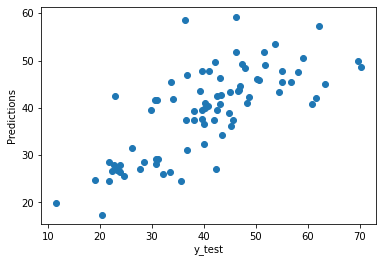

In [61]:
plt.scatter(y_test, predictions6)
plt.xlabel('y_test')
plt.ylabel('Predictions')

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions6))
print('MSE:', metrics.mean_squared_error(y_test, predictions6))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions6)))

MAE: 6.329024390243902
MSE: 70.44178048780488
RMSE: 8.39296017432496


In [63]:
print ("Linear Regression R2_Score             : ", score0)
print("Ridge Regression R2_Score              : ", score1)
print("Lasso Regression R2_Score              : ", score2)
print("Random_Forest Regression R2_Score      : ", score3)
print("XGB Regression R2_Score                : ", score4)
print("Decision_Tree Regression R2_Score      : ", score5)
print("KNN Regression R2_Score                : ", score6)

Linear Regression R2_Score             :  0.6142369074293226
Ridge Regression R2_Score              :  0.5882846155500194
Lasso Regression R2_Score              :  0.5764971159900509
Random_Forest Regression R2_Score      :  0.7762460290240878
XGB Regression R2_Score                :  0.7985673502943009
Decision_Tree Regression R2_Score      :  0.6214612069384351
KNN Regression R2_Score                :  0.5341662881188058
